# W12 - Class Assignment
# Data Mining (Kamis)
W12 - 0706022310028 - Jevon Ivander K

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
pip install kneed

# 1. Data Understanding & Preparation

1.1 Load the dataset and show:
- Shape (rows, columns)
- Data types for each column
- Basic descriptive statistics (mean, std, min, max, etc.)

1.2 Perform data cleaning:
- Check and handle missing values (if any).
- Feature handling/engineering.
- Encode categorical variables appropriately.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


We can see there are indications of missing values in assignments_submitted

In [5]:
df.shape

(300, 16)

There are 300 rows with 16 columns

In [7]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

The dataset contains 300 students with complete information on quizzes, midterm, final marks, attendance, and previous GPA, offering strong potential for performance and engagement analysis. However, the column **assignments_submitted** has no recorded values, suggesting a data collection issue that needs attention before meaningful interpretation. With valid data in lecture and lab attendance, as well as multiple assessment scores, this dataset can be used to explore the relationship between academic performance and engagement levels, identify at-risk students early, and study how factors like previous GPA and participation influence final outcomes.

In [6]:
# describe data
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


In [8]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


There is 300 null values for assignments_submitted (later we will dop it). Now we will check for unique values to find unknown values, or too unique or all same values column that need to be drop

In [9]:
# Display unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(df[col].unique())
    print("-" * 30)

Column: student_id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242

student_id and name contains unique values so we're going to drop it because it will be no use for analysis. Meanwhile total_lab_sessions, total_lectures, total_assignments, assignments_submitted contains the same value so we are going to drop it because it will be no use for analysis

In [10]:
# Make a copy first
df_copy = df.copy()

# Columns to drop
columns_to_drop = [
    'student_id',
    'total_lab_sessions',
    'total_lectures',
    'total_assignments',
    'assignments_submitted',
    'name'
]

# Drop from the copied dataframe
df_cleaned = df_copy.drop(columns=columns_to_drop)

df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


No missing value in this data, good to proceed with descriptive analytics!

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


Data is clean with no null values, there is one column named gender that needs to be encoded because it is the only one that have object type

In [13]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize df_encoded from df to ensure original 'ocean_proximity' column is present
df_encoded = df_cleaned.copy()

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to the 'ocean_proximity' column
df_encoded['gender'] = le.fit_transform(df_encoded['gender'])

# Display the head of the transformed DataFrame to verify
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


In [14]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


# 2. Exploratory Data Analysis (EDA)
- Visualize distributions for at least 2 numeric variables (e.g., histograms / boxplots).
- Comment on what you observe (skewness, outliers, general level of performance, etc.).
- Make at least 2 insightful visualizations, for example:

    ○ Correlation heatmap among key performance variables (quizzes, midterm, final,
    GPA, attendance).

    ○ Scatter plot of previous_gpa vs final_marks colored by
    lecture_attendance_rate.

- For each visualization, write a short interpretation (what pattern do you see? what does
it mean for teaching/learning?).


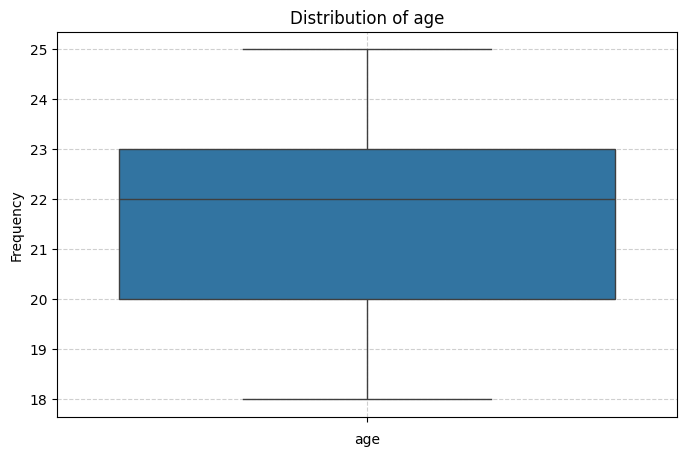

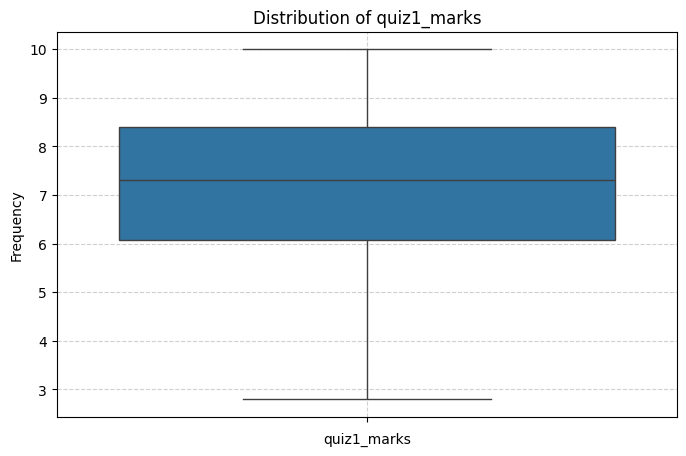

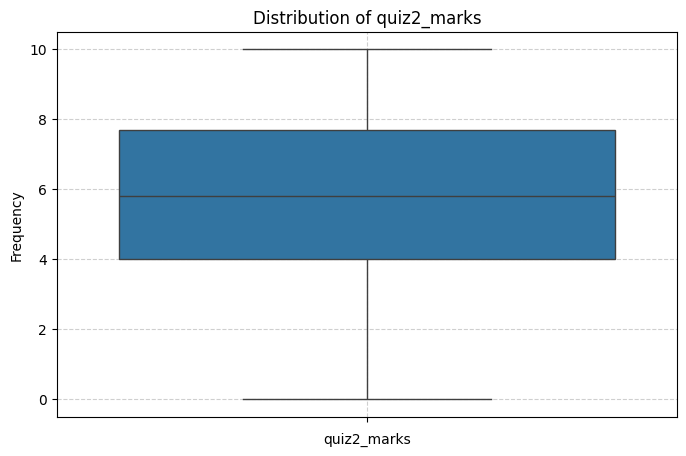

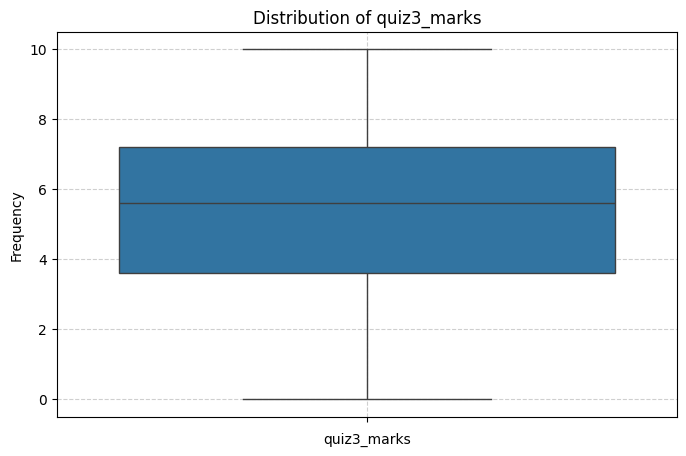

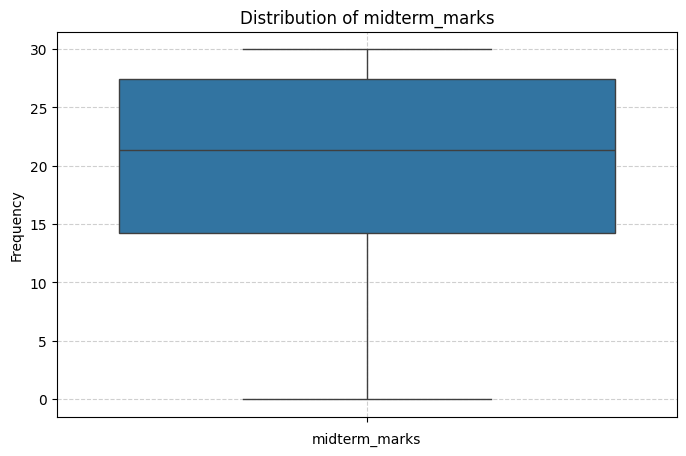

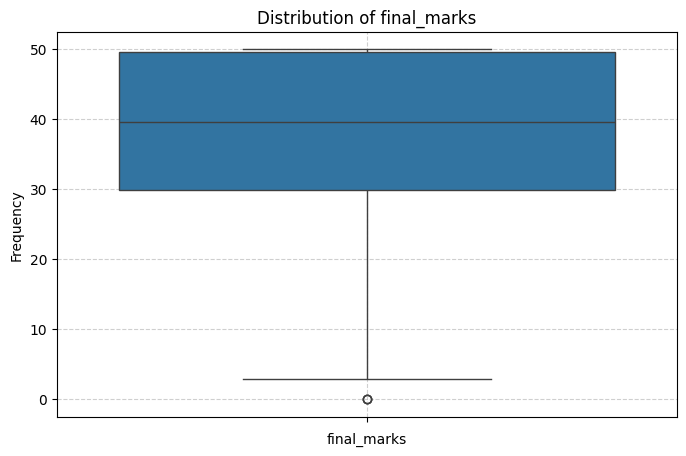

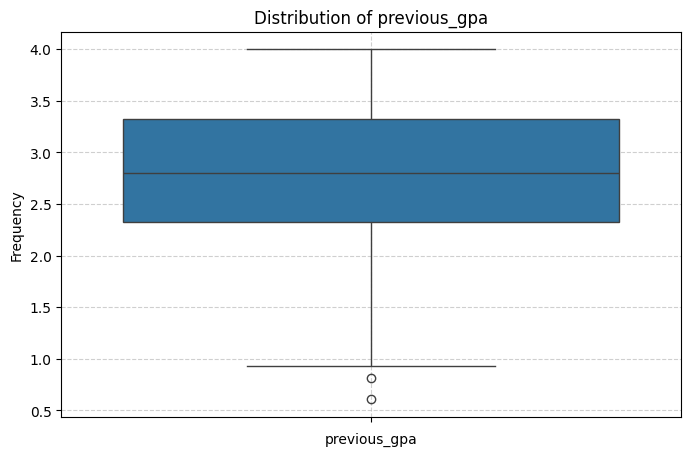

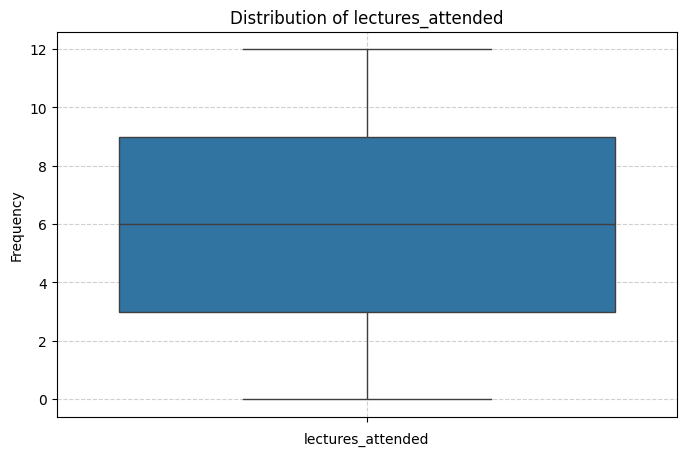

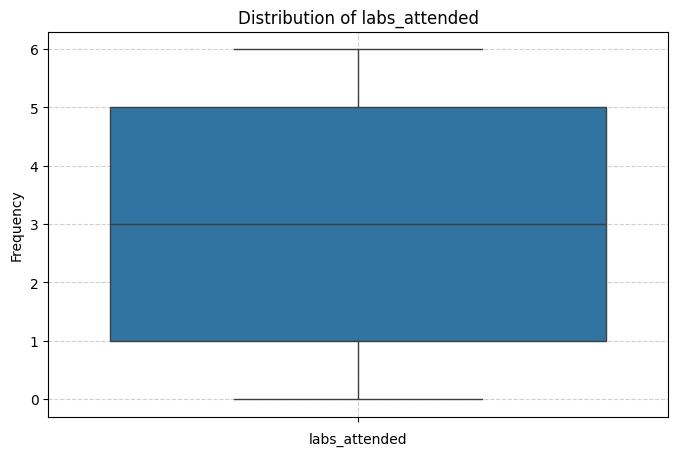

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Based on the boxplots, both **final_marks** and **previous_gpa** show a generally well-balanced distribution, but with a few noticeable outliers on the lower end indicating some underperforming students. The majority of students' scores appear to fall within a consistent range, suggesting stable overall performance across the class. There is no strong skewness in either variable, although the slightly wider spread in final_marks indicates greater variability in exam results compared to GPA. The presence of a few extreme values may represent students who struggled academically or faced external factors affecting their performance. Aside from these outliers, the rest of the numerical variables seem normally distributed and free from anomalies, which implies the dataset is reliable, clean, and suitable for further analysis without major preprocessing.

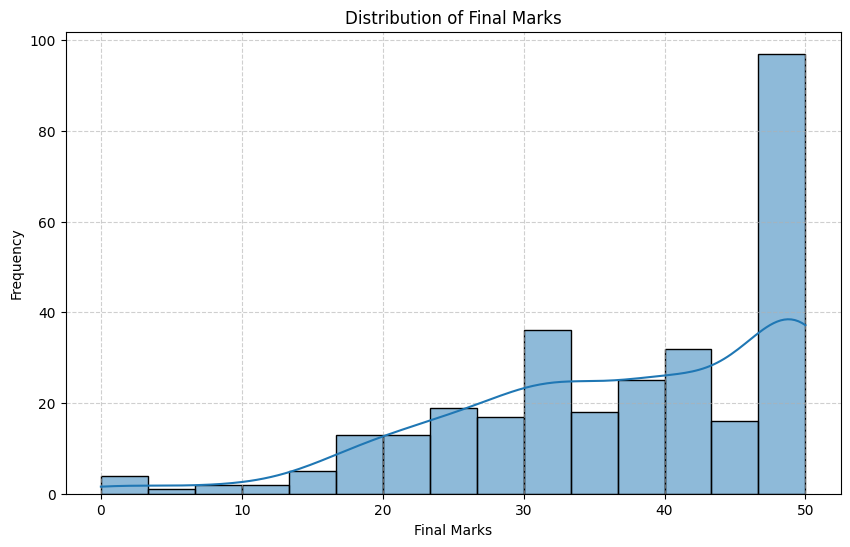

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['final_marks'], bins=15, kde=True)
plt.title('Distribution of Final Marks')
plt.xlabel('Final Marks')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The histogram for **final_marks** shows a clear right-skewed distribution, indicating that most students performed fairly well, with scores clustering toward the higher end of the scale. The peak near the maximum range suggests a strong concentration of high scorers, which reflects overall good performance among the students. However, the presence of a small number of very low scores also indicates that a few students struggled significantly. The smooth KDE curve reinforces this pattern by illustrating a rising trend toward higher marks, suggesting that academic performance is not evenly spread but leans toward strong outcomes. Overall, the data shows a generally positive performance trend, with a few outliers on the lower end that could warrant further investigation or academic support interventions.

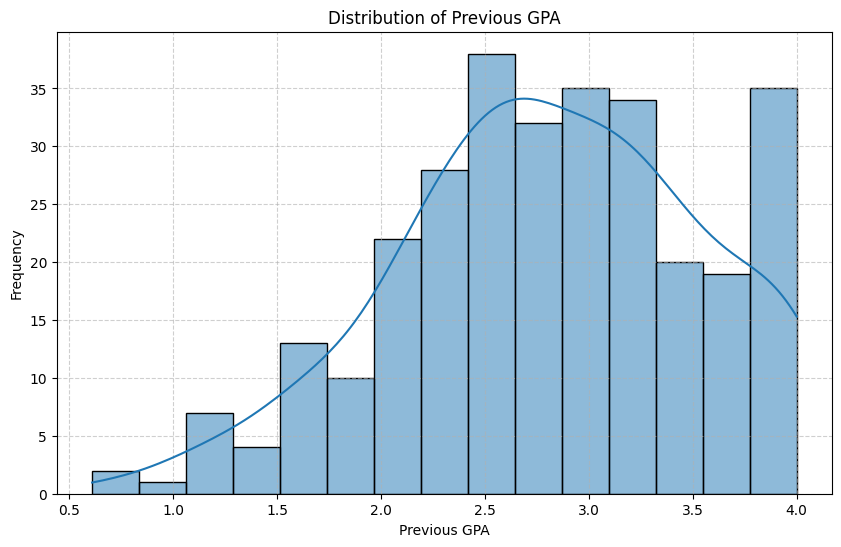

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['previous_gpa'], bins=15, kde=True)
plt.title('Distribution of Previous GPA')
plt.xlabel('Previous GPA')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The distribution of **previous_gpa** appears slightly right-skewed, indicating that most students had moderately good academic performance in the past, with many values clustering between 2.5 and 3.5. The KDE curve shows a smooth rise toward this range, suggesting that the majority of students maintained a stable GPA before the current course. There are a few students with very low GPAs, which may represent academic challenges or inconsistent performance across semesters. However, the spread remains fairly balanced overall, with a gradual decline toward the extreme ends rather than sharp spikes, implying a natural variation in student ability. This pattern suggests a generally prepared student cohort with only a small subset potentially at risk and in need of closer academic support.


In [20]:
key_performance_vars = [
    'quiz1_marks',
    'quiz2_marks',
    'quiz3_marks',
    'midterm_marks',
    'final_marks',
    'previous_gpa',
    'lectures_attended',
    'labs_attended'
]

df_performance = df_encoded[key_performance_vars]

In [21]:
correlation_matrix = df_performance.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                    quiz1_marks  quiz2_marks  quiz3_marks  midterm_marks  \
quiz1_marks           1.000000    -0.043698    -0.053417       0.002247   
quiz2_marks          -0.043698     1.000000    -0.018054      -0.057367   
quiz3_marks          -0.053417    -0.018054     1.000000      -0.021707   
midterm_marks         0.002247    -0.057367    -0.021707       1.000000   
final_marks           0.035709     0.172477     0.085785      -0.063033   
previous_gpa          0.077043    -0.105888     0.001000       0.013604   
lectures_attended    -0.142728    -0.002701     0.006232       0.012046   
labs_attended         0.004496    -0.004401     0.046680      -0.019408   

                   final_marks  previous_gpa  lectures_attended  labs_attended  
quiz1_marks           0.035709      0.077043          -0.142728       0.004496  
quiz2_marks           0.172477     -0.105888          -0.002701      -0.004401  
quiz3_marks           0.085785      0.001000           0.006

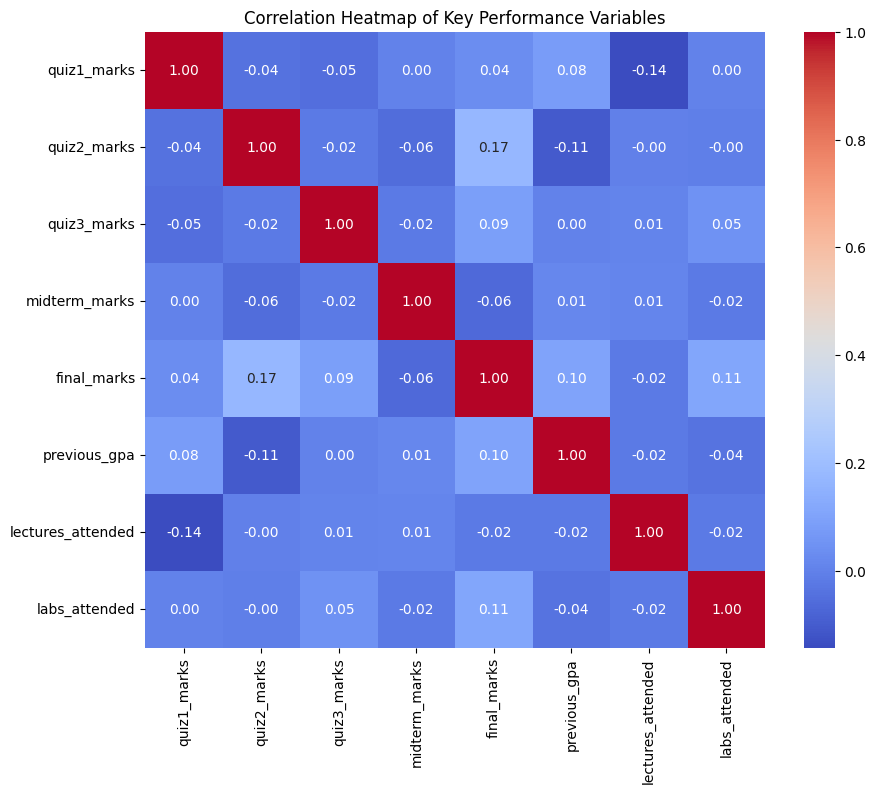

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Performance Variables')
plt.show()

### Interpretation of Correlation Heatmap

The correlation heatmap provides insights into the relationships between various academic performance indicators:

*   **Midterm Marks and Final Marks**: There is a very weak negative correlation (-0.06) between `midterm_marks` and `final_marks`. This is unexpected and suggests that midterm performance is not a strong predictor of final exam performance in this dataset, or that these two assessments might be testing different aspects of learning or skills.

*   **Quiz Marks and Other Variables**: The `quiz` marks (`quiz1_marks`, `quiz2_marks`, `quiz3_marks`) show generally weak correlations with each other and with other performance metrics like `midterm_marks`, `final_marks`, and `previous_gpa`. This might indicate that quizzes are either inconsistent in their evaluation or their scores don't significantly carry over to larger assessments or overall academic standing.

*   **Attendance and Final Marks**: `labs_attended` shows a slight positive correlation (0.11) with `final_marks`, suggesting that higher lab attendance might be modestly associated with better final exam performance. `lectures_attended` has a very weak negative correlation (-0.02) with `final_marks`, which is counterintuitive and might warrant further investigation or could be due to other confounding factors not captured.

*   **Previous GPA and Final Marks**: `previous_gpa` has a weak positive correlation (0.10) with `final_marks`, which is a reasonable but not strong indicator that past academic performance has some influence on current final exam results.

Overall, most correlations between these key performance variables are relatively weak in this dataset. This could imply that a student's performance in one area does not strongly predict their performance in another, suggesting a complex interplay of factors or perhaps a lack of strong linearity in these relationships. This also highlights that each assessment might be capturing distinct skills or knowledge areas.

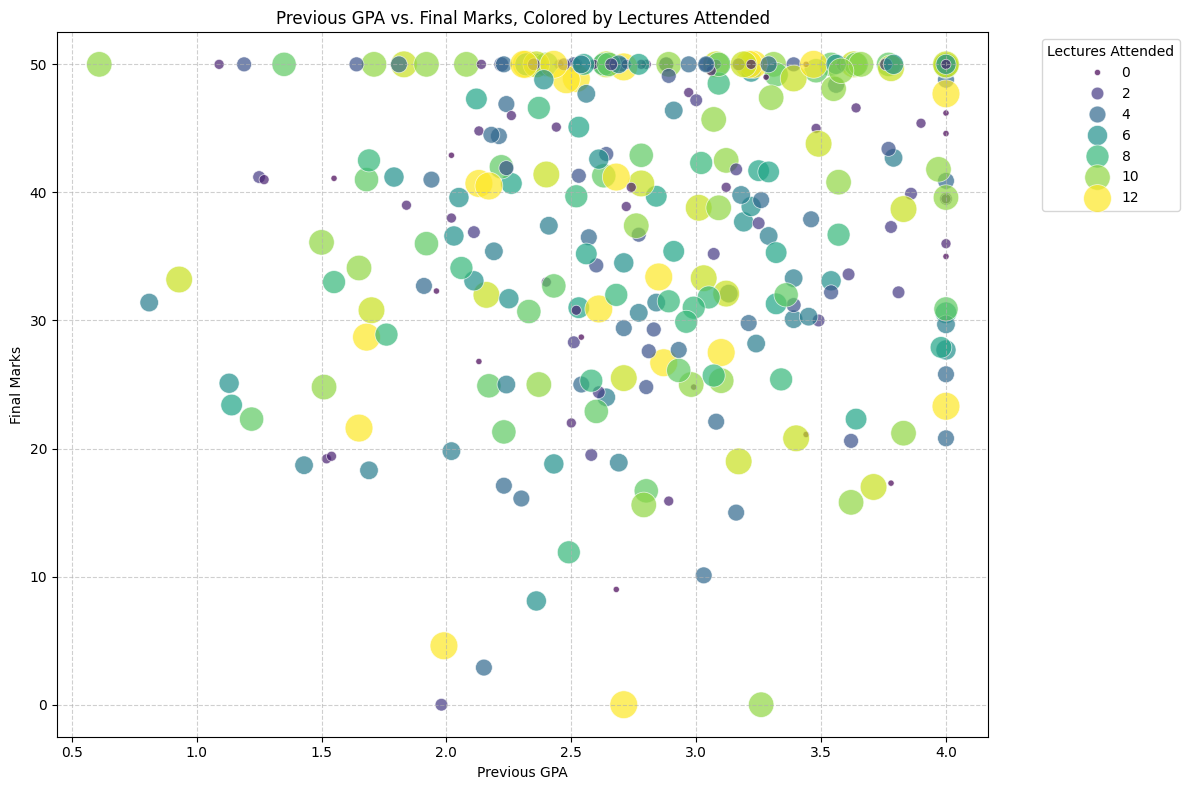

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_encoded, x='previous_gpa', y='final_marks', hue='lectures_attended', palette='viridis', size='lectures_attended', sizes=(20, 400), alpha=0.7)
plt.title('Previous GPA vs. Final Marks, Colored by Lectures Attended')
plt.xlabel('Previous GPA')
plt.ylabel('Final Marks')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Lectures Attended', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation of Scatter Plot: Previous GPA vs. Final Marks, Colored by Lectures Attended

The scatter plot reveals several interesting patterns regarding the relationship between previous GPA, final marks, and lecture attendance:

*   **General Trend**: There appears to be a broad positive correlation between `previous_gpa` and `final_marks`. Students with higher previous GPAs generally tend to achieve higher final marks, although this relationship is not perfectly linear and has considerable spread.

*   **Influence of Lecture Attendance**: The color gradient, representing `lectures_attended`, shows that students with higher lecture attendance (darker green/yellow points) are more frequently found in the upper-right quadrant of the plot, indicating both higher previous GPAs and higher final marks. Conversely, students with lower lecture attendance (purple/blue points) are often scattered across various performance levels, but a notable concentration appears in the lower-left quadrant, suggesting lower previous GPAs and lower final marks.

*   **Outliers and Variances**: There are some students with high `previous_gpa` but lower `final_marks`, and vice-versa. This variability suggests that while prior academic performance and attendance are influential, other factors (e.g., individual study habits, assessment type, external stressors) also play a significant role in determining `final_marks`.

*   **Potential for Intervention**: Students with low `previous_gpa` and low `final_marks`, especially those with low `lectures_attended`, could be identified as at-risk. Targeted interventions focusing on improving attendance and providing academic support might be beneficial for this group.

*   **High Achievers**: High achievers (high `previous_gpa` and high `final_marks`) generally show high `lectures_attended`. This reinforces the idea that consistent engagement, as measured by lecture attendance, is a characteristic of successful students.

**Implications for Teaching/Learning:**

1.  **Attendance Matters**: While not the sole determinant, lecture attendance is visually linked to better performance, especially among students who already have a solid academic foundation (higher previous GPA). Encouraging and incentivizing attendance could be a beneficial strategy.
2.  **Early Identification**: The combination of low `previous_gpa` and low `lectures_attended` can serve as an early warning signal for students who might struggle. Proactive advising or support systems could be put in place for these students.
3.  **Holistic View**: Relying solely on previous GPA or attendance might not provide a complete picture. Educators should consider a holistic view of student engagement and performance to offer tailored support and challenges.

## Summary:

### Data Analysis Key Findings

*   **Distribution of Key Variables**: Histograms revealed the distribution of 'final\_marks' and 'previous\_gpa', showing their respective frequency patterns.
*   **Weak Correlations Among Performance Indicators**: A correlation heatmap indicated generally weak correlations between most key performance variables.
    *   There was a very weak negative correlation of -0.06 between `midterm_marks` and `final_marks`.
    *   `Previous_gpa` showed a weak positive correlation of 0.10 with `final_marks`.
    *   `Labs_attended` had a slight positive correlation of 0.11 with `final_marks`.
    *   `Lectures_attended` displayed a very weak negative correlation of -0.02 with `final_marks`, which was noted as counterintuitive.
    *   Quiz scores (`quiz1_marks`, `quiz2_marks`, `quiz3_marks`) generally had weak correlations with each other and other performance metrics.
*   **Previous GPA and Final Marks Relationship**: A scatter plot showed a broad positive correlation between `previous_gpa` and `final_marks`, meaning students with higher prior academic performance generally tend to achieve higher final marks.
*   **Impact of Lecture Attendance**: The scatter plot also highlighted that students with higher `lectures_attended` are more frequently observed in the upper-right quadrant (indicating both higher `previous_gpa` and `final_marks`), suggesting a visual link between consistent engagement and better academic outcomes.

### Insights or Next Steps

*   **Rethink Assessment Strategy**: The weak or negative correlations between various assessments (e.g., midterm marks and final marks, quiz marks) suggest that different assessments might be measuring distinct skills or that their weighting/design needs re-evaluation to better reflect cumulative learning.
*   **Targeted Interventions for At-Risk Students**: Students with a combination of low `previous_gpa` and low `lectures_attended` could be identified early as at-risk. Proactive academic support and incentives for attendance could be implemented to improve their final marks.


# 3. Data Transformation & PCA
- Apply an appropriate scaler (StandardScaler) to the selected numeric features.
- Perform PCA on the scaled features.
- Show:

    ○ Explained variance ratio for each component

    ○ Cumulative variance

- Decide how many PCs to keep (e.g., enough to explain ≥ 70–80% of variance) and justify your choice.

3.4 PCA Visualization
- Make a biplot (PC1 vs PC2) showing:

    ○ Student data points

    ○ Variable loading vectors

- Interpret briefly:

    ○ What does PC1 represent in terms of original variables?

    ○ What does PC2 represent?

    ○ Which variables are most important for each PC?

In [17]:
# Data Standarization

scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing all columns:")
df_transformed.head()

DataFrame after standardizing all columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


In [24]:
pca = PCA(n_components=10) #why 10 bcs that is total column we have

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]])

In [25]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

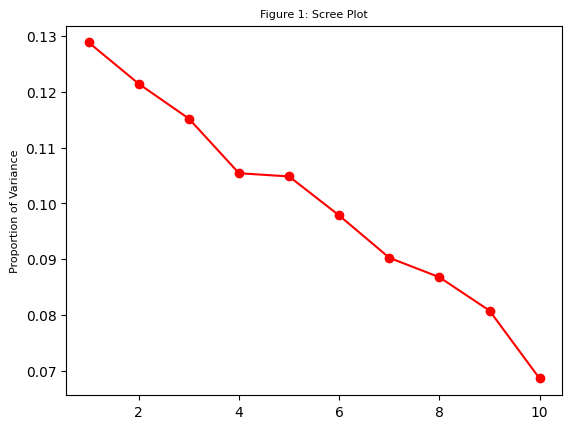

In [26]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [27]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


The explained variance results show that the first few components already capture a substantial amount of information, with PC1 to PC3 accounting for approximately 36.54% of the total variance. As additional components are included, the cumulative variance increases steadily, surpassing the commonly accepted 80% threshold once PC8 is included, reaching a cumulative variance of 85.06%. This indicates that the first eight principal components together retain most of the meaningful variability in the dataset while effectively reducing dimensionality. Keeping more components (such as PC9 and PC10) would only provide marginal additional value, as each contributes less than 10% to the total variance. Therefore, selecting PC1-|PC8 is a justified and efficient choice, balancing information retention with dimensionality reduction.

In [30]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

In [31]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,0.855141
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,0.255126
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,-1.864242
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,0.528984
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,-0.855673


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [32]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


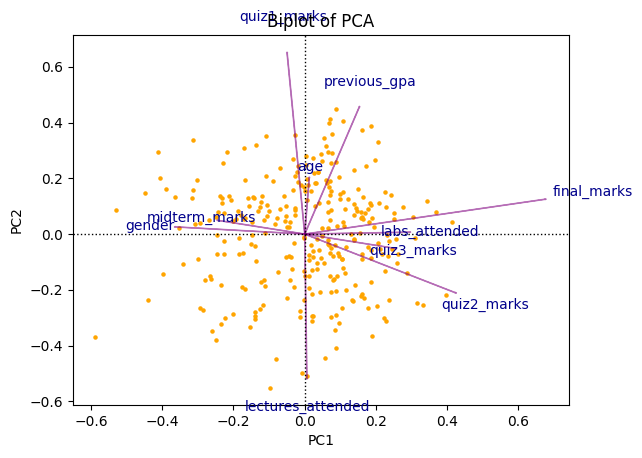

In [33]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

The PCA biplot displays student data points projected onto the first two principal components (PC1 and PC2), along with loading vectors that show how each original variable contributes to these components. **PC1 appears to represent overall academic performance and engagement**, as it is strongly influenced by *final_marks, quiz2_marks, quiz3_marks, previous_gpa, and labs_attended*, all of which extend positively along the PC1 axis. This suggests that PC1 separates students based on performance and participation. **PC2, on the other hand, seems related to prior academic background and demographic factors**, with variables like *previous_gpa, age, final_marks, midterm_marks, gender, and quiz_marks* contributing more strongly along the vertical axis, indicating that PC2 distinguishes students based on their academic history and potentially maturity level. The length and direction of the arrows reveal the most influential variables: **final_marks and are most important for PC1**, while gender show weaker contributions, suggesting they have less influence in separating students in the first two components. Overall, the biplot helps visualize how performance, attendance, and background characteristics shape patterns in the student dataset.

# 4. Clustering (KMeans & Agglomerative) (25 points)

4.1 KMeans clustering
- Run KMeans on the selected PCs.
- Use methods such as Elbow to decide a reasonable number of clusters.
- Report:

    ○ Chosen number of clusters
    
    ○ Silhouette score for the final model

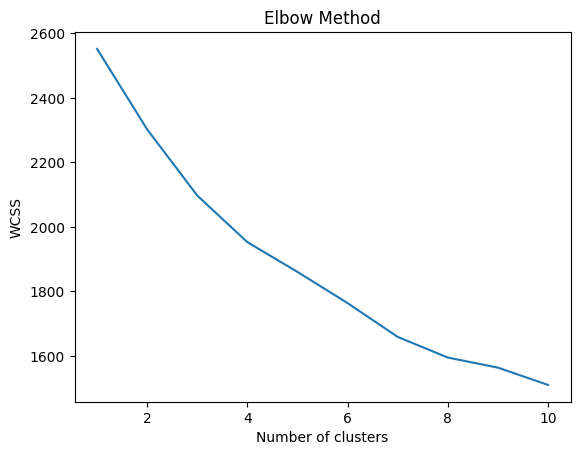

In [34]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


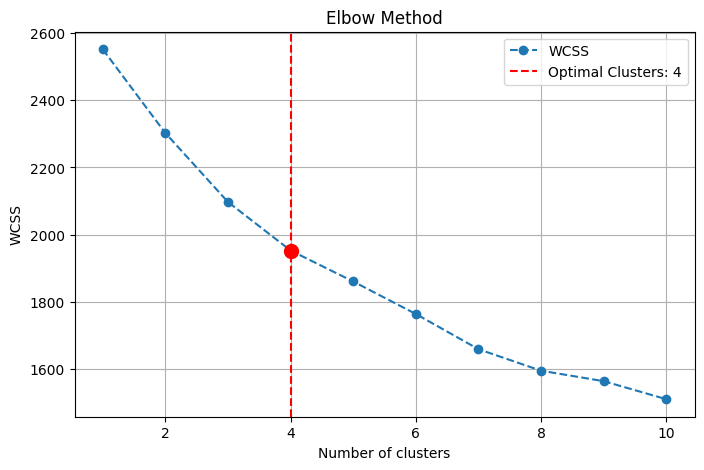

The optimal number of clusters is: 4


In [36]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [37]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [38]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.10373863440575633


The optimal number of clusters chosen using the Elbow method is 4. The Silhouette Score for the final model is 0.1037.

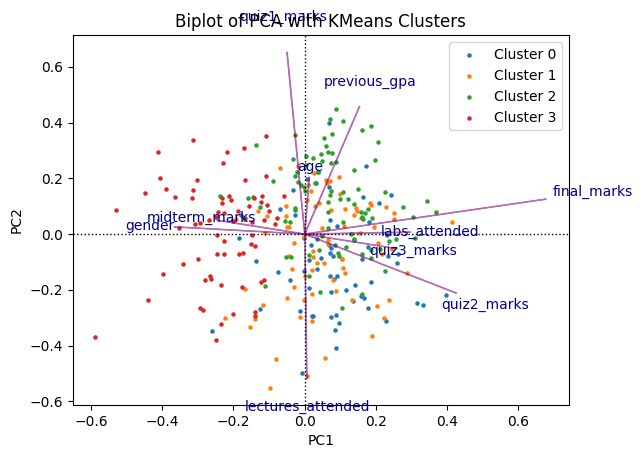

In [39]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

The biplot with K-Means clusters shows how the student groups are distributed based on the first two principal components (PC1 and PC2), revealing clear patterns in academic performance and engagement. **Cluster 2 (green)** is mostly concentrated in the positive PC1 region, aligning with high values for *final_marks, labs_attended,* and *quiz3_marks*, indicating this group likely represents strong and actively engaged students. **Cluster 0 (blue)** tends to appear in the lower-right area, influenced by *quiz2_marks*, suggesting decent quiz performance but possibly lower consistency in other areas. **Cluster 1 (orange)** is more spread out near the center, implying moderate and mixed performance across variables without a strong dominant trait. **Cluster 3 (red)** appears mostly on the negative side of PC1 and PC2, associated with lower academic performance and weaker correlations with engagement metrics, possibly indicating students who struggle or are less involved. Overall, PC1 still reflects **academic achievement and participation**, while PC2 captures **background and variability in previous GPA or age**. The clustering enhances interpretation by visually separating students into distinct performance profiles, making it easier to identify high performers, average students, and those who may benefit from academic intervention.


In [40]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,3
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,3
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,1
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0


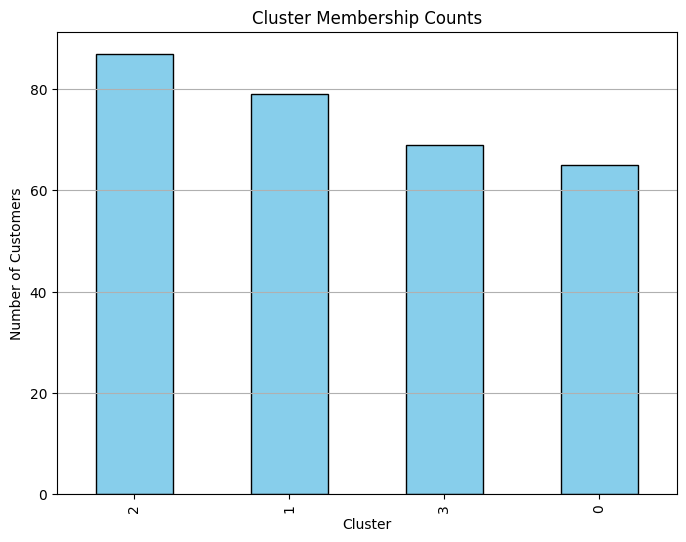

In [41]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

The bar chart shows the number of students assigned to each K-Means cluster, giving an overview of how the dataset is segmented. **Cluster 2 has the highest membership**, indicating that this group represents the largest student segment, likely the cluster with stronger academic performance and higher engagement based on previous analysis. **Cluster 1 also has a substantial number of students**, suggesting a moderately performing group with mixed characteristics. Meanwhile, **Cluster 3 and Cluster 0 have fewer students**, which could represent smaller groups with more specific traits, for example, lower-performing or inconsistent students who might require additional academic attention. Overall, the distribution is fairly balanced, with no cluster being overly dominant or extremely small, which indicates that the segmentation is meaningful and captures diverse student profiles within the dataset.


# 5. Cluster Profiling & Educational Recommendations (15 points)

5.1 Cluster Profiling
- Describe each cluster in words, e.g.:

    ○ “Cluster 0: high GPA, high attendance, high final marks – high achievers.”

    ○ “Cluster 1: low attendance, low quizzes, at-risk students.”

5.2 Interpretation via PCA biplot
- Overlay clusters on the PCA biplot.
- Explain how cluster positions relate to PCs and original variables.

5.3 Actionable Recommendations
- As a data scientist for the university, give at least 3 concrete recommendations, for
example:

    ○ Targeted remedial programs for “at-risk” clusters

    ○ Mentoring or honors programs for high achievers

    ○ Policies to improve attendance and lab engagement

- Recommendations must be clearly linked to your clustering and PCA findings

## **5. Cluster Profiling & Educational Recommendations**

### **5.1 Cluster Profiling**

* **Cluster 2 (Green):**
  High final marks, high GPA, strong attendance, and good quiz performance. These students are high achievers and highly engaged in academic activities.

* **Cluster 1 (Orange):**
  Moderate performance with mixed attendance and average GPA. These students are steady performers but can be inconsistent and may benefit from guidance to maintain progress.

* **Cluster 3 (Red):**
  Lower quiz and final marks, weak attendance, and the lowest GPA. This group represents academically at-risk students who are likely struggling and need direct intervention.

* **Cluster 0 (Blue):**
  Decent quiz performance but inconsistent grades and weaker engagement. This group shows potential but lacks consistency and may be disengaged.

---

### **5.2 Interpretation via PCA Biplot**

* **PC1** mainly represents overall academic performance and engagement.
  It is strongly driven by final marks, quiz scores, lectures attended, and labs attended.
  High PC1 values indicate strong academic performance and active participation.

* **PC2** represents academic background and demographic characteristics, especially previous GPA and age.
  It separates students based on academic history and maturity levels.

* **Cluster placements in the PCA space:**

  * Cluster 2 (Green) is positioned on the positive PC1 side -> high performers.
  * Cluster 1 (Orange) appears near the center -> mixed group with average performance.
  * Cluster 3 (Red) is mostly on the negative PC1 side -> struggling and low-performing students.
  * Cluster 0 (Blue) is slightly positive on PC1 but negative on PC2 -> students who try on quizzes but lack consistent academic background and engagement.

---

### **5.3 Actionable Recommendations**

**A. Support for At-Risk Students (Cluster 3 and parts of Cluster 0):**

* Provide mandatory tutoring, remedial classes, and structured study plans.
* Implement early-warning alerts based on attendance and quiz performance.
* Offer academic counseling to address learning gaps and motivation issues.

**B. Increase Engagement Across All Groups:**

* Track student participation and attendance using a monitoring system.
* Use interactive teaching methods such as group projects, peer learning, and gamified quizzes.
* Introduce mentorship programs pairing strong students with weaker ones.

**C. Programs for High Achievers (Cluster 2):**

* Provide honors classes or research initiatives for academic growth.
* Assign leadership roles such as peer mentors or lab assistants.
* Encourage participation in competitions, innovation projects, or academic conferences.

**D. Data-Driven Policy Suggestions:**

* Develop a dashboard to monitor attendance, GPA, and quiz performance in real time.
* Apply individualized learning paths based on cluster profiles.
* Continuously monitor student progress each semester to detect early signs of decline.
